# Learning Basic Reinforcement Learning

### Bellman's Equation

$$
V(s) = \max_a \left\{ R(s, a) + \gamma \sum_{s'} {P(s'|s,a) V(s')} \right\}
$$

- $s$ is the state
- $a$ is the action
- $V(s)$ is the value of state $s$
- $R(s, a)$ is the immediate reward for choosing action $a$ in state $s$
- $P(s'|s, a)$ is the probability of transitioning from state $s$ to state $s'$, by taking the action $a$
- $\gamma$ is the discount factor that determines the importance of future rewards

### Q-learning

Update the Q-value of a state-action pair based on the difference between the observed reward and the expected reward.

Q-value : The expected cumulative reward of taking action $a$ in state $s$ and following optimal policy thereafter.

$$
Q(s, a) = Q(s, a) + \alpha \left(R(s, a) + \gamma \max_{a'} \left\{Q(s',a')-Q(s,a)\right\}\right)

In [97]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.width = 4
        self.height = 4
        self.pos = np.array([0, 0])
        self.treasure = np.array([3, 3])
        self.pit = np.array([2, 2])

    def step(self, action):
        reward = 0
        done = False

        if action == 0:
            self.pos[0] = max(self.pos[0] - 1, 0)
        elif action == 1:
            self.pos[0] = min(self.pos[0] + 1, self.height - 1)
        elif action == 2:
            self.pos[1] = max(self.pos[1] - 1, 0)
        elif action == 3:
            self.pos[1] = min(self.pos[1] + 1, self.width - 1)
        
        if np.all(self.pos == self.treasure):
            reward = 1
            done = True
        elif np.all(self.pos == self.pit):
            reward = -1
            done = True
        
        return self.pos, reward, done


In [103]:
class QLearningAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.9, epsilon=1):
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.random.randn(4, 4, n_actions)

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        else:
            return np.argmax(self.Q[state[0], state[1], :])
    
    def learn(self, state, action, reward, next_state, done):
        q_next = np.max(self.Q[next_state[0], next_state[1], :])
        self.Q[state[0], state[1], action] += self.alpha * (reward + self.gamma * q_next - self.Q[state[0], state[1], action])
        

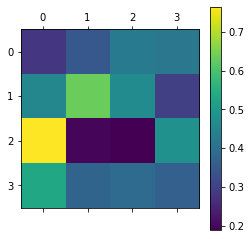

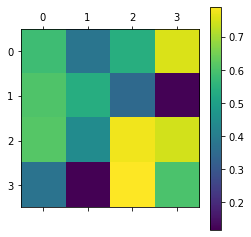

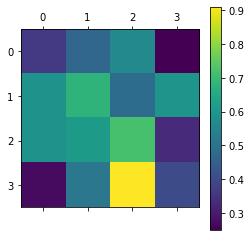

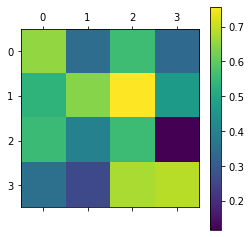

In [104]:
env = GridWorld()
agent = QLearningAgent(n_actions=4)

sigmoid_Q = 1/(1+np.exp(-agent.Q))

import matplotlib.pyplot as plt

for i in range(agent.n_actions):
    mat = plt.matshow(sigmoid_Q[:,:,i])
    plt.colorbar(mat)
    # Show the plot
    plt.show()

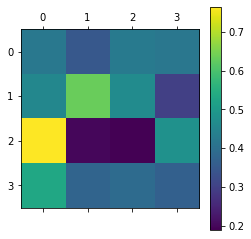

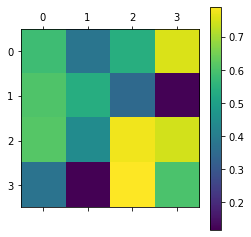

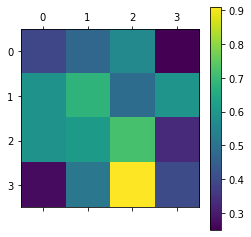

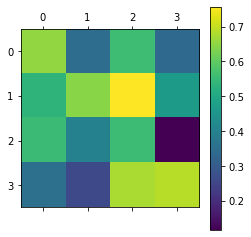

In [105]:
for i in range(10):
    state = env.pos
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    # print("size of next state", next_state.size())
    agent.learn(state, action, reward, next_state, done)
    if done:
        env.__init__()

sigmoid_Q = 1/(1+np.exp(-agent.Q))
for i in range(agent.n_actions):
    mat = plt.matshow(sigmoid_Q[:,:,i])
    plt.colorbar(mat)
    # Show the plot
    plt.show()